# Lab 1 Analysis Example using Thicket

In [273]:
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [274]:
# # jupyter
# tk = th.Thicket.from_caliperreader(glob("/home/stevenm27/435Project/caliper/cpu_mpi/naive/*.cali", recursive=True))

# local
parallel = 'cpu_mpi'
algo = 'naive'

# GLOBAL VARS
process_cols = (1, 2, 4, 8, 16, 32, 64, 128) # MPI NAIVE
# process_cols = (1, 4, 16, 64) # MPI SUMMA
# process_cols = (1, 2, 4, 8, 16, 32) # CUDA NAIVE

tk = th.Thicket.from_caliperreader(glob(f"../caliper/{parallel}/{algo}/*.cali", recursive=True))

# Performance data
tk.dataframe.head(20)
# tk.metadata

nid   spot.channel  \
node                                 profile                          
{'name': 'main', 'type': 'function'} 56718137      1  regionprofile   
                                     70157952      1  regionprofile   
                                     161254057     1  regionprofile   
                                     193647232     1  regionprofile   
                                     198667367     1  regionprofile   
                                     212659646     1  regionprofile   
                                     265741475     1  regionprofile   
                                     282856941     1  regionprofile   
                                     344982673     1  regionprofile   
                                     580003439     1  regionprofile   
                                     586154693     1  regionprofile   
                                     639226367     1  regionprofile   
                                     798568224     1  regionprofile   
                                     883849861     1  regionprofile   
                                     1314647116    1  regionprofile   
                                     1318847218    1  regionprofile   
                                     1341074084    1  regionprofile   
                                     1830382938    1  regionprofile   
                                     1856770933    1  regionprofile   
                                     1976710412    1  regionprofile   

                                                 Min time/rank  Max time/rank  \
node                                 profile                                    
{'name': 'main', 'type': 'function'} 56718137        32.456763    2572.727139   
                                     70157952      2634.841114    2634.841114   
                                     161254057        2.819830      66.892633   
                                     193647232       94.743396    1454.893124   
                                     198667367        1.937511       7.917518   
                                     212659646        1.346687       2.278765   
                                     265741475        0.500207       0.958925   
                                     282856941        3.731073     129.566792   
                                     344982673        0.346411       0.400129   
                                     580003439        6.152744       9.262938   
                                     586154693        3.376828       4.015285   
                                     639226367       11.980253      11.980253   
                                     798568224      109.049736     109.049736   
                                     883849861        1.325889       7.550431   
                                     1314647116       0.638461       1.090898   
                                     1318847218       1.155419       1.155419   
                                     1341074084       6.131866       9.241619   
                                     1830382938     328.697990    1675.564007   
                                     1856770933       4.591423      65.259147   
                                     1976710412       0.529886       1.233589   

                                                 Avg time/rank   Total time  \
node                                 profile                                  
{'name': 'main', 'type': 'function'} 56718137        53.529805  6851.814990   
                                     70157952      2634.841114  2634.841114   
                                     161254057        5.492441   175.758118   
                                     193647232      179.756225  2876.099606   
                                     198667367        3.432799    13.731198   
                                     212659646        1.380882   176.752954   
                                     265741475        0.615386     2.46

Compose these 3 groups column-wise to get a holistic view of the data

In [275]:
gb = tk.groupby("num_procs")

ctk = th.Thicket.concat_thickets(
    thickets=list(gb.values()),
    headers=list(gb.keys()),
    axis="columns",
    metadata_key="InputSize"
)
ctk.dataframe.head(20)

8  thickets created...
{1: <thicket.thicket.Thicket object at 0x00000121801D4210>, 2: <thicket.thicket.Thicket object at 0x00000121F6E90390>, 4: <thicket.thicket.Thicket object at 0x00000121F9EE8910>, 8: <thicket.thicket.Thicket object at 0x00000121FCD48750>, 16: <thicket.thicket.Thicket object at 0x0000012181D18C10>, 32: <thicket.thicket.Thicket object at 0x00000121FAB361D0>, 64: <thicket.thicket.Thicket object at 0x00000121F9B03350>, 128: <thicket.thicket.Thicket object at 0x00000121FB4EC250>}


1                 \
                                                     nid   spot.channel   
node                                       InputSize                      
{'name': 'main', 'type': 'function'}       128         1  regionprofile   
                                           256         1  regionprofile   
                                           512         1  regionprofile   
                                           1024        1  regionprofile   
                                           2048        1  regionprofile   
                                           4096        1  regionprofile   
{'name': 'comm', 'type': 'function'}       128         3  regionprofile   
                                           256         3  regionprofile   
                                           512         3  regionprofile   
                                           1024        3  regionprofile   
                                           2048        3  regionprofile   
                                           4096        3  regionprofile   
{'name': 'barrier', 'type': 'function'}    128         7  regionprofile   
                                           256         7  regionprofile   
                                           512         7  regionprofile   
                                           1024        7  regionprofile   
                                           2048        7  regionprofile   
                                           4096        7  regionprofile   
{'name': 'comm_large', 'type': 'function'} 128         4  regionprofile   
                                           256         4  regionprofile   

                                                                    \
                                                     Min time/rank   
node                                       InputSize                 
{'name': 'main', 'type': 'function'}       128            3.432390   
                                           256            0.362575   
                                           512            1.155419   
                                           1024          11.980253   
                                           2048         109.049736   
                                           4096        2634.841114   
{'name': 'comm', 'type': 'function'}       128            0.003541   
                                           256            0.000457   
                                           512            0.000973   
                                           1024           0.003429   
                                           2048           0.011523   
                                           4096           0.042316   
{'name': 'barrier', 'type': 'function'}    128            0.000035   
                                           256            0.000032   
                                           512            0.000037   
                                           1024           0.000046   
                                           2048           0.000056   
                                           4096           0.000047   
{'name': 'comm_large', 'type': 'function'} 128            0.003459   
                                           256            0.000377   

                                                                    \
                                                     Max time/rank   
node                                       InputSize                 
{'name': 'main', 'type': 'function'}       128            3.432390   
                                           256            0.362575   
                                           512            1.155419   
                                           1024          11.980253   
                                           2048         109.049736   
                                           4096        2634.841114   
{'name': 'comm', 'type': 'function'}       128            0.003541   
                  

Perform pandas operations to get the table in a desirable format for plotting

In [276]:
# Drop unwanted columns
array = [("node","")]
for i in process_cols:
    # comment out the one you wnat to plot
    array.append((i,"nid"))
    array.append((i,"spot.channel"))
    array.append((i,"Min time/rank"))
    array.append((i,"Max time/rank"))
    # array.append((i,"Avg time/rank"))
    array.append((i,"Total time"))
    array.append((i,"Variance time/rank"))

ctk.dataframe = ctk.dataframe.reset_index().drop(array, axis=1)
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("InputSize", ""): "InputSize"}).set_index(["name", "InputSize"])

ctk.dataframe.columns

MultiIndex([(  1, 'Avg time/rank'),
            (  2, 'Avg time/rank'),
            (  4, 'Avg time/rank'),
            (  8, 'Avg time/rank'),
            ( 16, 'Avg time/rank'),
            ( 32, 'Avg time/rank'),
            ( 64, 'Avg time/rank'),
            (128, 'Avg time/rank')],
           )

In [277]:
# ctk.dataframe.loc['comp_large']

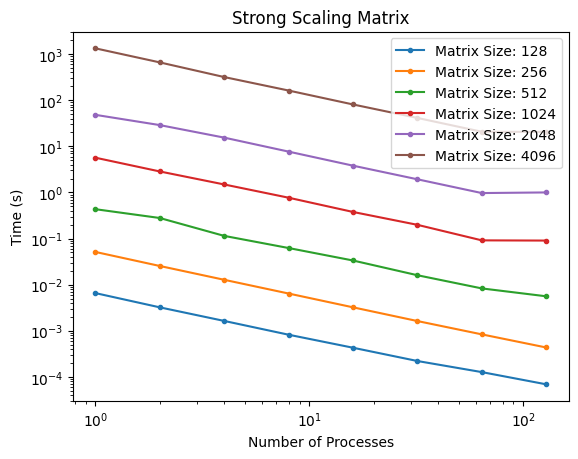

                      1             2             4             8  \
          Avg time/rank Avg time/rank Avg time/rank Avg time/rank   
InputSize                                                           
128            0.006571      0.003225      0.001636      0.000822   
256            0.051313      0.025445      0.012767      0.006428   
512            0.433621      0.279273      0.114367      0.062361   
1024           5.677029      2.854619      1.490861      0.769409   
2048          48.244931     28.906262     15.463790      7.687774   
4096        1335.765326    661.878411    318.380785    162.409658   

                     16            32            64           128  
          Avg time/rank Avg time/rank Avg time/rank Avg time/rank  
InputSize                                                          
128            0.000429      0.000221      0.000127      0.000069  
256            0.003227      0.001626      0.000836      0.000434  
512            0.033438      0.016024 

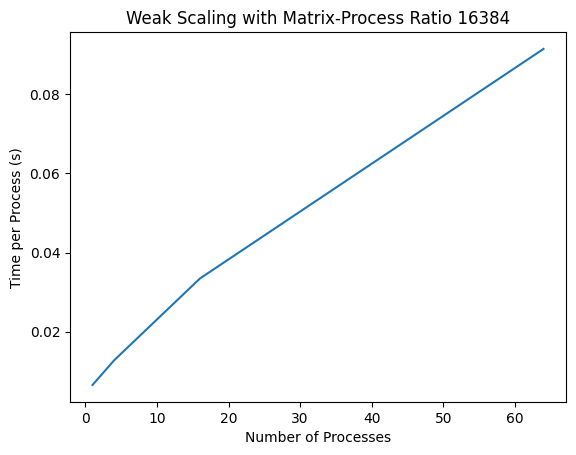

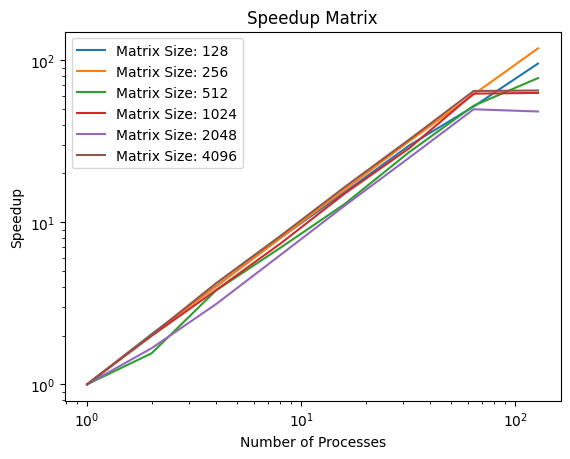

In [278]:
# Plot stuff!
df = ctk.dataframe
matrix_sizes = [128, 256, 512, 1024, 2048, 4096]
caliper_label = 'comp'

# Strong Scaling: Time vs Procs
for matrix_size in matrix_sizes:
    data = df.loc[caliper_label, matrix_size]
    data.index = data.index.droplevel(1)
    axis = data.plot(
        title=f"Strong Scaling Matrix",
        label=f"Matrix Size: {matrix_size}",
        xlabel="Number of Processes",
        ylabel="Time (s)",
        marker=".",
    )
    axis.set_xscale("log")
    axis.set_yscale("log")
plt.legend()
plt.show()


# Weak Scaling: Time per Proc vs Procs
import numpy as np
subset = df.loc[caliper_label]
print(subset)
data = []
labels = []
ratio = subset.index[0]**2 // subset.columns[0][0]
for i in range(subset.shape[1]):
    num_procs = subset.columns[i][0]
    target_size = (num_procs * ratio) ** 0.5
    try:
        data.append(subset.iloc[:, i].loc[target_size])
        labels.append(num_procs)
    except KeyError:
        continue
data = pd.Series(data)
data.index = labels
print(data)
# data = pd.Series(np.diag(df.loc[caliper_label].to_numpy()))
# data.index = matrix_sizes
plt.plot(data)
plt.title(f"Weak Scaling with Matrix-Process Ratio {ratio}")
plt.xlabel("Number of Processes")
plt.ylabel("Time per Process (s)")
# plt.xscale("log")
# plt.yscale("log")
plt.show()


# Speedup: Sequential Time / Parallel Time vs Procs
for matrix_size in matrix_sizes:
    data = df.loc[caliper_label, matrix_size]
    data.index = data.index.droplevel(1)
    data.name = f"Matrix Size: {matrix_size}"
    axis = (data.iloc[0] / data).plot(
        title=f"Speedup Matrix",
        xlabel="Number of Processes",
        ylabel="Speedup",
    )
    axis.name = f"Matrix Size: {matrix_size}"
    axis.set_xscale("log")
    axis.set_yscale("log")
plt.legend()
plt.show()


In [279]:
# import matplotlib.pyplot as plt

# # Assuming your DataFrame is named 'df'
# df = ctk.dataframe

# # Define the matrix sizes you want to plot
# matrix_sizes = [128, 256, 512, 1024, 2048, 4096]

# # Define the communication and computation data series
# comm = ["barrier", "bcast", "gather", "scatter"]
# comp = ["comp_large", "data_init", "correctness"]

# # Loop through matrix sizes and communication data series
# for j, data_series in enumerate(comm):
#     for i, matrix_size in enumerate(matrix_sizes):
#         plt.figure(figsize=(10, 5))  # Create a new figure for each plot
#         ax = plt.gca()
#         data = df.loc[(data_series, matrix_size), :]
#         data.index = data.index.droplevel(1)  # Remove the first level of the MultiIndex
#         data.plot(ax=ax, title=f'Matrix Size: {matrix_size}, Comm: {data_series}')
#         ax.set_xlabel("num_procs")
#         ax.set_ylabel("Time (seconds)")
#         plt.show()

# # Loop through matrix sizes and computation data series
# for j, data_series in enumerate(comp):
#     for i, matrix_size in enumerate(matrix_sizes):
#         plt.figure(figsize=(10, 5))  # Create a new figure for each plot
#         ax = plt.gca()
#         data = df.loc[(data_series, matrix_size), :]
#         data.index = data.index.droplevel(1)  # Remove the first level of the MultiIndex
#         data.plot(ax=ax, title=f'Matrix Size: {matrix_size}, Comp: {data_series}')
#         ax.set_xlabel("num_procs")
#         ax.set_ylabel("Time (seconds)")
#         plt.show()

In [280]:
# Define common variables
function_names = set(ctk.dataframe.index.get_level_values("name"))
threads = sorted(list(set(ctk.dataframe.index.get_level_values("num_procs"))))
matrix_sizes = sorted(ctk.dataframe.columns.tolist())

KeyError: 'Level num_procs not found'

# Plotting

### Option 1
Use `pandas.DataFrame.plot` to automatically interface with matplotlib

In [ ]:
def plot_pandas(df, title, xlabel, ylabel, loglog):
    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        grid=True,
        loglog=loglog
    )
    return plot

### Option 2
Use `matplotlib.pyplot` directly for more fine-grained control. Specifically for our case we can change the x axis scaling from base 10 to base 2.

In [ ]:
def plot_mpl(df, title, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o',
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(matrix_sizes)
    plt.grid(True)
    plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

# Examples

## time

In [ ]:
ctk.dataframe.loc["main"]

4                                           \
          Min time/rank Max time/rank Avg time/rank   Total time   
InputSize                                                          
128            0.392027      0.398540      0.393913     1.575651   
256            0.346411      0.400129      0.360285     1.441141   
512            0.500207      0.958925      0.615386     2.461545   
1024           1.937511      7.917518      3.432799    13.731198   
2048          16.257582     80.443053     32.304383   129.217530   
4096         328.697990   1675.564007    665.414500  2661.657998   

                                         8                              \
          Variance time/rank Min time/rank Max time/rank Avg time/rank   
InputSize                                                                
128                 0.000007      0.433096      0.440360      0.434221   
256                 0.000529      0.492410      0.554987      0.503490   
512                 0.039340      0.529886      1.233589      0.620466   
1024                6.704234      1.325889      7.550431      2.105368   
2048              772.443856      8.460777     69.807645     16.129681   
4096           340134.008948    179.716693   1563.045031    352.633664   

                                                     16                \
            Total time Variance time/rank Min time/rank Max time/rank   
InputSize                                                               
128           3.473769           0.000005      6.131866      9.241619   
256           4.027923           0.000395      0.508943      0.568770   
512           4.963731           0.053707      0.520784      1.136749   
1024         16.842943           4.235534      0.951594      6.832092   
2048        129.037449         411.617690      4.591423     65.259147   
4096       2821.069309      209299.382431     94.743396   1454.893124   

                                                                   32  \
          Avg time/rank   Total time Variance time/rank Min time/rank   
InputSize                                                               
128            7.685408   122.966527           2.398687      6.152744   
256            0.518767     8.300279           0.000184      0.574143   
512            0.564259     9.028137           0.021859      0.522779   
1024           1.323841    21.181450           2.022738      0.701745   
2048           8.386800   134.188794         215.630935      2.819830   
4096         179.756225  2876.099606      108398.274082     45.091347   

                                                                       \
          Max time/rank Avg time/rank   Total time Variance time/rank   
InputSize                                                               
128            9.262938      6.933099   221.859167           1.797111   
256            0.643461      0.589362    18.859579           0.000127   
512            1.005280      0.548887    17.564379           0.006770   
1024           7.764880      0.928738    29.719625           1.507534   
2048          66.892633      5.492441   175.758118         121.681125   
4096        1445.773181     88.866504  2843.728124       59393.410687   

                     64                                           \
          Min time/rank Max time/rank Avg time/rank   Total time   
InputSize                                                          
128            6.139745      9.087473      6.514431   416.923586   
256            3.180303      3.679889      3.591665   229.866588   
512            0.460709      1.103177      0.518809    33.203748   
1024          19.128636     29.219222     22.336157  1429.514063   
2048           2.269738     62.094665      3.961659   253.546177   
4096          23.617032   1422.557660     45.483347  2910.934204   

                                       128                              \
          Variance time/rank Min time/rank Max time/rank Avg time/rank   
InputSi

In [ ]:
for name in function_names:
    plot_pandas(
        df=ctk.dataframe.loc[name],
        title=name,
        xlabel="Threads",
        ylabel="Time (seconds)",
        loglog=True
    )

NameError: name 'function_names' is not defined

In [ ]:
for name in function_names:
    plot_mpl(
        df=ctk.dataframe.loc[name],
        title=name,
        xlabel="num_procs",
        ylabel="Time (seconds)",
    )

## Speedup

In [ ]:
speedup_df = ctk.dataframe.loc[(slice(None),1), :].reset_index().drop("threads", axis=1).set_index("name")/ctk.dataframe

for name in function_names:
    plot_pandas(
        df=speedup_df.loc[name],
        title=f"{name}: thread-1/thread-N",
        xlabel="Threads",
        ylabel="Speedup",
        loglog=False
    )